In [6]:
import math

import numpy as np
import torch
import torch.nn as nn

$PE_{p,2i}=\sin\left(\frac{p}{10000^{\frac{2i}{d_model}}}\right)$

$PE_{p,2i+1}=\cos\left(\frac{p}{10000^{\frac{2i}{d_model}}}\right)$

where $1\leq 2i, 2i+1\leq d_model$ are the feature indexes in the encoding, and $p$ is the position.

In [7]:
def get_positional_encoding(d_model: int, max_len:int = 5000):
    encodings = torch.zeros(max_len, d_model)
    position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)
    
    two_i = torch.arange(0, d_model, 2, dtype=torch.float32)
    div_term = torch.exp(two_i * -(math.log(10000.0) / d_model))
    
    encodings[:, 0::2] = torch.sin(position * div_term)
    encodings[:, 1::2] = torch.cos(position * div_term)
    encodings = encodings.unsqueeze(1).requires_grad_(False)
    
    return encodings

In [8]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, dropout: float, max_len: int = 5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.register_buffer('positional_encodings', get_positional_encoding(d_model, max_len), False)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        pe = self.positional_encodings[:x.shape[0]].detach().requires_grad_(False)
        x = x + pe
        return self.dropout(x)

In [9]:
def _test_positional_encoding():
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(15, 5))
    pe = get_positional_encoding(20, 100)
    plt.plot(np.arange(100), pe[:, 0, 4:8].numpy())
    plt.legend(["dim %d" % p for p in [4, 5, 6, 7]])
    plt.title("Positional encoding")
    plt.show()

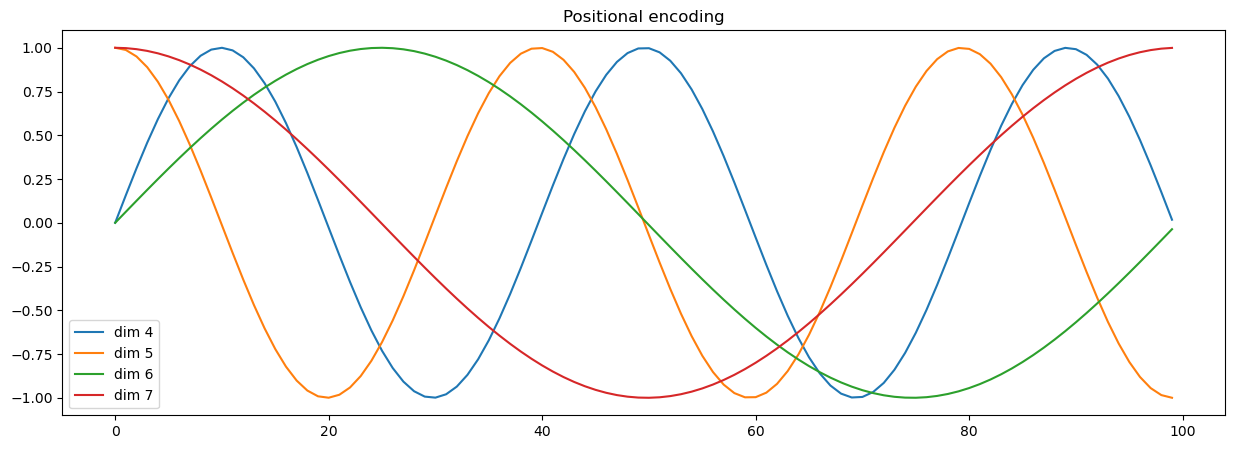

In [10]:
_test_positional_encoding()